In [11]:
import pandas as pd

In [12]:
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None) 

In [13]:
df = pd.read_excel("C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/future climate data/past_result.xlsx")
df.head(4)

,year,"(January, mean_dbt)","(January, min_dbt)","(January, max_dbt)","(January, mean_rh)","(January, mean_ghi)","(January, 99th_percentile_ghi)","(January, mean_drsr)","(January, 99th_percentile_drsr)","(January, mean_dfhr)","(January, 99th_percentile_dfhr)","(January, mean_ws)","(February, mean_dbt)","(February, min_dbt)","(February, max_dbt)","(February, mean_rh)","(February, mean_ghi)","(February, 99th_percentile_ghi)","(February, mean_drsr)","(February, 99th_percentile_drsr)","(February, mean_dfhr)","(February, 99th_percentile_dfhr)","(February, mean_ws)","(March, mean_dbt)","(March, min_dbt)","(March, max_dbt)","(March, mean_rh)","(March, mean_ghi)","(March, 99th_percentile_ghi)","(March, mean_drsr)","(March, 99th_percentile_drsr)","(March, mean_dfhr)","(March, 99th_percentile_dfhr)","(March, mean_ws)","(April, mean_dbt)","(April, min_dbt)","(April, max_dbt)","(April, mean_rh)","(April, mean_ghi)","(April, 99th_percentile_ghi)","(April, mean_drsr)","(April, 99th_percentile_drsr)","(April, mean_dfhr)","(April, 99th_percentile_dfhr)","(April, mean_ws)","(May, mean_dbt)","(May, min_dbt)","(May, max_dbt)","(May, mean_rh)","(May, mean_ghi)","(May, 99th_percentile_ghi)","(May, mean_drsr)","(May, 99th_percentile_drsr)","(May, mean_dfhr)","(May, 99th_percentile_dfhr)","(May, mean_ws)","(June, mean_dbt)","(June, min_dbt)","(June, max_dbt)","(June, mean_rh)","(June, mean_ghi)","(June, 99th_percentile_ghi)","(June, mean_drsr)","(June, 99th_percentile_drsr)","(June, mean_dfhr)","(June, 99th_percentile_dfhr)","(June, mean_ws)","(July, mean_dbt)","(July, min_dbt)","(July, max_dbt)","(July, mean_rh)","(July, mean_ghi)","(July, 99th_percentile_ghi)","(July, mean_drsr)","(July, 99th_percentile_drsr)","(July, mean_dfhr)","(July, 99th_percentile_dfhr)","(July, mean_ws)","(August, mean_dbt)","(August, min_dbt)","(August, max_dbt)","(August, mean_rh)","(August, mean_ghi)","(August, 99th_percentile_ghi)","(August, mean_drsr)","(August, 99th_percentile_drsr)","(August, mean_dfhr)","(August, 99th_percentile_dfhr)","(August, mean_ws)","(September, mean_dbt)","(September, min_dbt)","(September, max_dbt)","(September, mean_rh)","(September, mean_ghi)","(September, 99th_percentile_ghi)","(September, mean_drsr)","(September, 99th_percentile_drsr)","(September, mean_dfhr)","(September, 99th_percentile_dfhr)","(September, mean_ws)","(October, mean_dbt)","(October, min_dbt)","(October, max_dbt)","(October, mean_rh)","(October, mean_ghi)","(October, 99th_percentile_ghi)","(October, mean_drsr)","(October, 99th_percentile_drsr)","(October, mean_dfhr)","(October, 99th_percentile_dfhr)","(October, mean_ws)","(November, mean_dbt)","(November, min_dbt)","(November, max_dbt)","(November, mean_rh)","(November, mean_ghi)","(November, 99th_percentile_ghi)","(November, mean_drsr)","(November, 99th_percentile_drsr)","(November, mean_dfhr)","(November, 99th_percentile_dfhr)","(November, mean_ws)","(December, mean_dbt)","(December, min_dbt)","(December, max_dbt)","(December, mean_rh)","(December, mean_ghi)","(December, 99th_percentile_ghi)","(December, mean_drsr)","(December, 99th_percentile_drsr)","(December, mean_dfhr)","(December, 99th_percentile_dfhr)","(December, mean_ws)"
0,Grid1000_pTRY_50th_1981-2010_lat26-39_long78-1...,14.631828,1.9,29.0,66.022849,440.935943,682.00,449.766323,680.85,193.745520,283.42,0.803710,18.710744,5.2,31.6,62.495536,433.266667,800.32,433.262238,709.61,193.486207,332.67,0.922054,24.592742,5.5,41.2,48.678763,541.467647,895.28,493.623881,752.71,210.711765,346.42,1.094624,31.166917,14.1,42.7,36.834722,576.847025,956.43,498.843931,749.00,217.380000,303.81,1.325472,35.135457,20.3,45.7,39.287634,588.617251,934.57,452.043127,693.14,237.876011,323.00,1.484570,34.598139,21.8,44.8,47.644444,535.837270,951.81,431.470255,690.43,226.314667,388.62,1.670278,29.979785,23.9,41.8,76.669355,393.961433,919.14,311.666667,669.00,233.452514,424.14,1.290591,30.308522,25.3,40.7,78.826613,329.840841,858.13,278.874251,620.14,223.379205,421.71,1.242527,28.247417,2

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4790 entries, 0 to 4789
Columns: 133 entries, year to (December, mean_ws)
dtypes: float64(132), object(1)
memory usage: 4.9+ MB


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

data_cleaned = df.drop(columns=['year'])

correlation_matrix = data_cleaned.corr()
print(correlation_matrix)

                                  (January, mean_dbt)  (January, min_dbt)  \
(January, mean_dbt)                          1.000000            0.899871   
(January, min_dbt)                           0.899871            1.000000   
(January, max_dbt)                           0.832648            0.606297   
(January, mean_rh)                          -0.134517            0.161341   
(January, mean_ghi)                          0.695196            0.600965   
...                                               ...                 ...   
(December, mean_drsr)                        0.470855            0.331863   
(December, 99th_percentile_drsr)             0.647931            0.586874   
(December, mean_dfhr)                        0.165135            0.199349   
(December, 99th_percentile_dfhr)             0.495189            0.570261   
(December, mean_ws)                          0.751624            0.747813   

                                  (January, max_dbt)  (January, mean_rh)  \

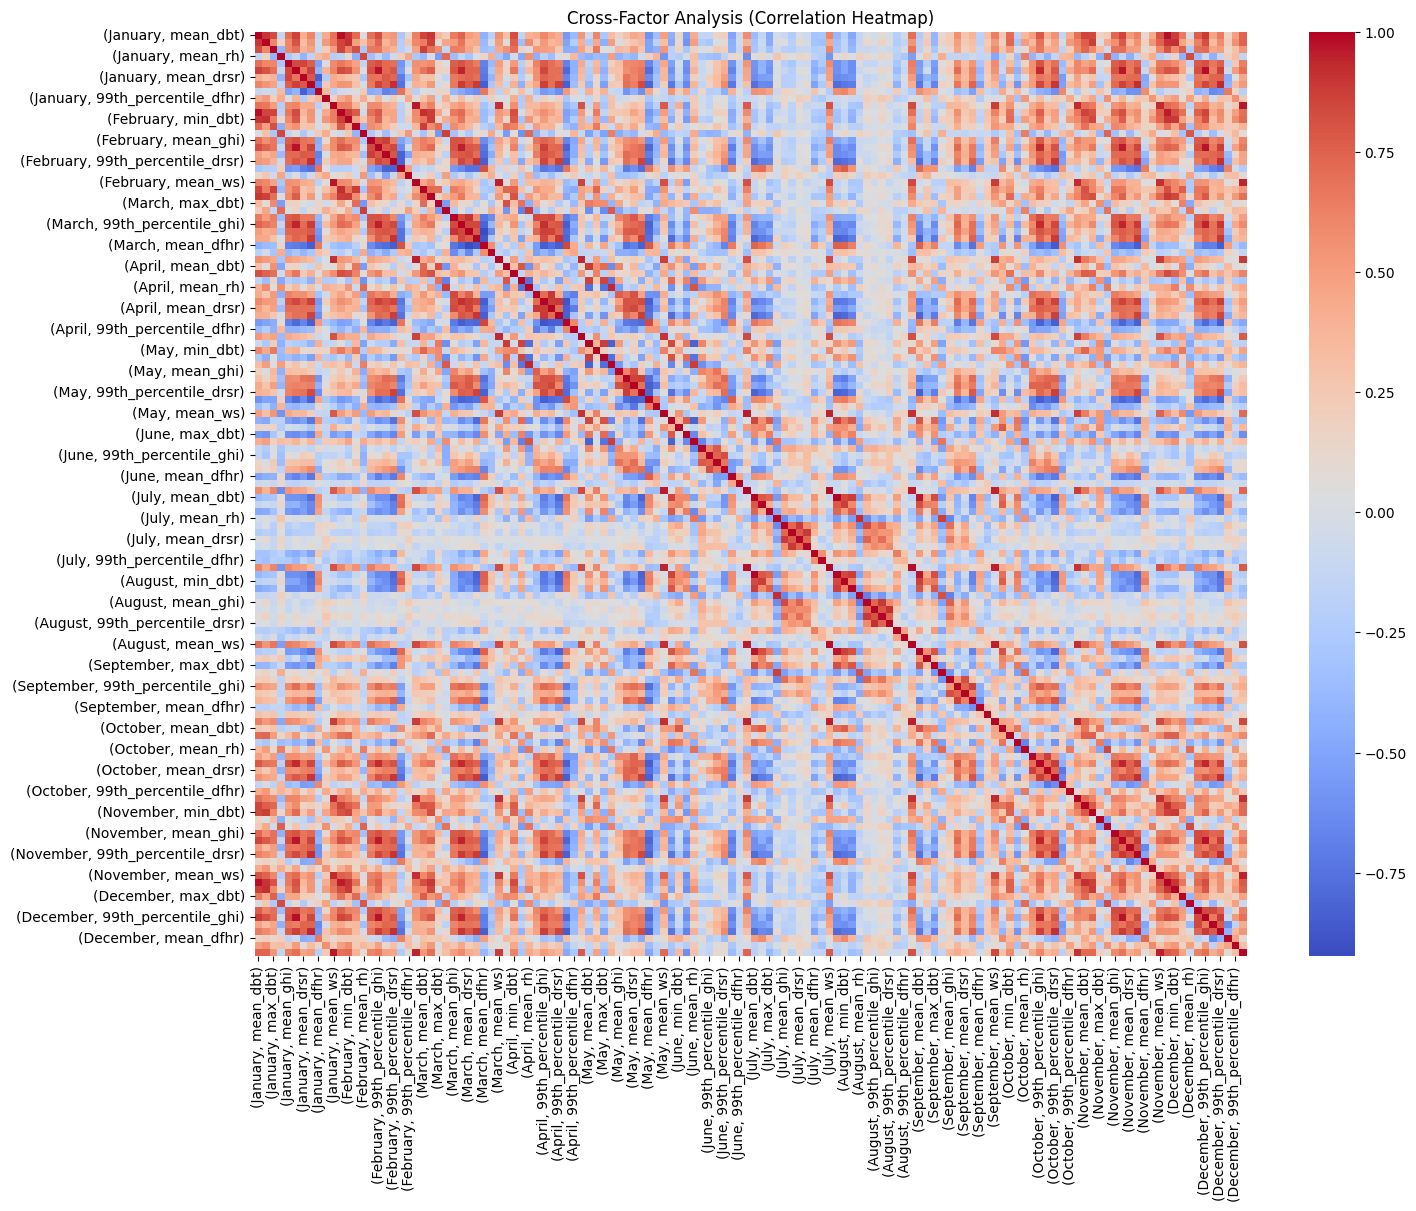

In [16]:
# Visualization using a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", cbar=True)
plt.title("Cross-Factor Analysis (Correlation Heatmap)")
plt.show()

In [21]:
import numpy as np

# Compute the correlation matrix
corr_matrix = data_cleaned.corr().abs()

# Select the upper triangle of the correlation matrix
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find columns with correlations above 0.95
correlation_threshold = -0.95
high_corr_columns = [column for column in upper_triangle.columns if any(upper_triangle[column] > correlation_threshold)]

print(f"Columns to drop (correlation > {correlation_threshold}):", high_corr_columns)

# Drop the highly correlated columns
data_cleaned = data_cleaned.drop(columns=high_corr_columns)


Columns to drop (correlation > -0.95): ['(January, min_dbt)', '(January, max_dbt)', '(January, mean_rh)', '(January, mean_ghi)', '(January, 99th_percentile_ghi)', '(January, mean_drsr)', '(January, 99th_percentile_drsr)', '(January, mean_dfhr)', '(January, 99th_percentile_dfhr)', '(January, mean_ws)', '(February, min_dbt)', '(February, max_dbt)', '(February, mean_rh)', '(February, mean_ghi)', '(February, mean_drsr)', '(February, 99th_percentile_drsr)', '(February, mean_dfhr)', '(February, 99th_percentile_dfhr)', '(March, mean_dbt)', '(March, min_dbt)', '(March, max_dbt)', '(March, mean_rh)', '(March, mean_ghi)', '(March, mean_drsr)', '(March, 99th_percentile_drsr)', '(March, mean_dfhr)', '(March, 99th_percentile_dfhr)', '(March, mean_ws)', '(April, mean_dbt)', '(April, min_dbt)', '(April, max_dbt)', '(April, mean_rh)', '(April, mean_ghi)', '(April, 99th_percentile_ghi)', '(April, mean_drsr)', '(April, 99th_percentile_drsr)', '(April, mean_dfhr)', '(April, 99th_percentile_dfhr)', '(Apri

                             Feature  Importance
38      (April, 99th_percentile_ghi)    0.299801
81                (August, mean_ghi)    0.064822
71       (July, 99th_percentile_ghi)    0.057157
115  (November, 99th_percentile_ghi)    0.055296
70                  (July, mean_ghi)    0.033450
126  (December, 99th_percentile_ghi)    0.032142
60       (June, 99th_percentile_ghi)    0.021462
65                   (June, mean_ws)    0.020467
16   (February, 99th_percentile_ghi)    0.020004
84    (August, 99th_percentile_drsr)    0.018052


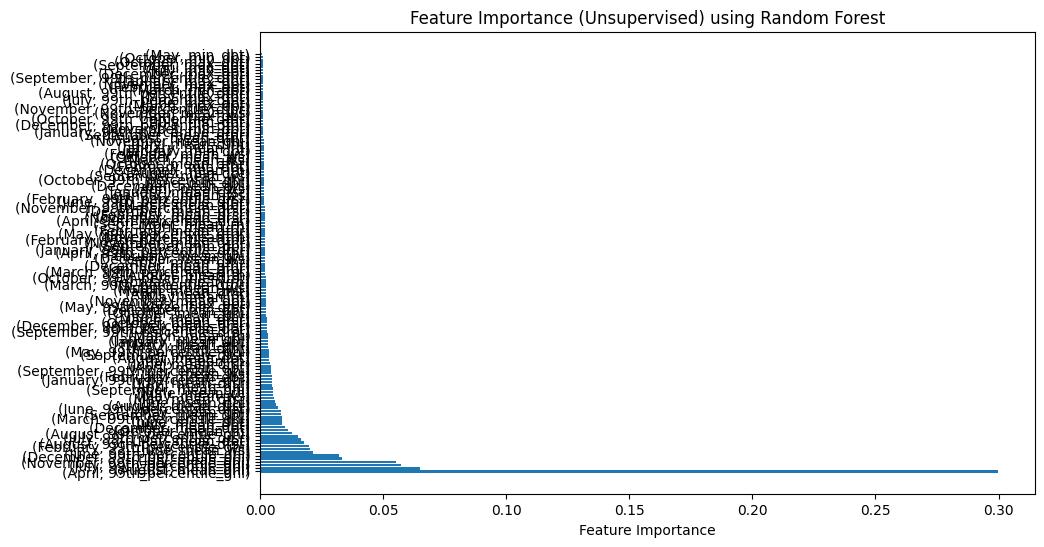

In [18]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Load your data
data = pd.read_excel("C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/future climate data/past_result.xlsx")

# Assume the entire dataset is features (no target column)
X = data.drop(columns = ['year'])

# Initialize and train the Random Forest model (use regression as it's unsupervised)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, X)  # Fit the model to the features

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to display features and their importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display top 10 features
print(importance_df.head(10))

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance (Unsupervised) using Random Forest')
plt.show()


In [19]:
X

,"(January, mean_dbt)","(January, min_dbt)","(January, max_dbt)","(January, mean_rh)","(January, mean_ghi)","(January, 99th_percentile_ghi)","(January, mean_drsr)","(January, 99th_percentile_drsr)","(January, mean_dfhr)","(January, 99th_percentile_dfhr)","(January, mean_ws)","(February, mean_dbt)","(February, min_dbt)","(February, max_dbt)","(February, mean_rh)","(February, mean_ghi)","(February, 99th_percentile_ghi)","(February, mean_drsr)","(February, 99th_percentile_drsr)","(February, mean_dfhr)","(February, 99th_percentile_dfhr)","(February, mean_ws)","(March, mean_dbt)","(March, min_dbt)","(March, max_dbt)","(March, mean_rh)","(March, mean_ghi)","(March, 99th_percentile_ghi)","(March, mean_drsr)","(March, 99th_percentile_drsr)","(March, mean_dfhr)","(March, 99th_percentile_dfhr)","(March, mean_ws)","(April, mean_dbt)","(April, min_dbt)","(April, max_dbt)","(April, mean_rh)","(April, mean_ghi)","(April, 99th_percentile_ghi)","(April, mean_drsr)","(April, 99th_percentile_drsr)","(April, mean_dfhr)","(April, 99th_percentile_dfhr)","(April, mean_ws)","(May, mean_dbt)","(May, min_dbt)","(May, max_dbt)","(May, mean_rh)","(May, mean_ghi)","(May, 99th_percentile_ghi)","(May, mean_drsr)","(May, 99th_percentile_drsr)","(May, mean_dfhr)","(May, 99th_percentile_dfhr)","(May, mean_ws)","(June, mean_dbt)","(June, min_dbt)","(June, max_dbt)","(June, mean_rh)","(June, mean_ghi)","(June, 99th_percentile_ghi)","(June, mean_drsr)","(June, 99th_percentile_drsr)","(June, mean_dfhr)","(June, 99th_percentile_dfhr)","(June, mean_ws)","(July, mean_dbt)","(July, min_dbt)","(July, max_dbt)","(July, mean_rh)","(July, mean_ghi)","(July, 99th_percentile_ghi)","(July, mean_drsr)","(July, 99th_percentile_drsr)","(July, mean_dfhr)","(July, 99th_percentile_dfhr)","(July, mean_ws)","(August, mean_dbt)","(August, min_dbt)","(August, max_dbt)","(August, mean_rh)","(August, mean_ghi)","(August, 99th_percentile_ghi)","(August, mean_drsr)","(August, 99th_percentile_drsr)","(August, mean_dfhr)","(August, 99th_percentile_dfhr)","(August, mean_ws)","(September, mean_dbt)","(September, min_dbt)","(September, max_dbt)","(September, mean_rh)","(September, mean_ghi)","(September, 99th_percentile_ghi)","(September, mean_drsr)","(September, 99th_percentile_drsr)","(September, mean_dfhr)","(September, 99th_percentile_dfhr)","(September, mean_ws)","(October, mean_dbt)","(October, min_dbt)","(October, max_dbt)","(October, mean_rh)","(October, mean_ghi)","(October, 99th_percentile_ghi)","(October, mean_drsr)","(October, 99th_percentile_drsr)","(October, mean_dfhr)","(October, 99th_percentile_dfhr)","(October, mean_ws)","(November, mean_dbt)","(November, min_dbt)","(November, max_dbt)","(November, mean_rh)","(November, mean_ghi)","(November, 99th_percentile_ghi)","(November, mean_drsr)","(November, 99th_percentile_drsr)","(November, mean_dfhr)","(November, 99th_percentile_dfhr)","(November, mean_ws)","(December, mean_dbt)","(December, min_dbt)","(December, max_dbt)","(December, mean_rh)","(December, mean_ghi)","(December, 99th_percentile_ghi)","(December, mean_drsr)","(December, 99th_percentile_drsr)","(December, mean_dfhr)","(December, 99th_percentile_dfhr)","(December, mean_ws)"
0,14.631828,1.9,29.0,66.022849,440.935943,682.00,449.766323,680.85,193.745520,283.42,0.803710,18.710744,5.2,31.6,62.495536,433.266667,800.32,433.262238,709.61,193.486207,332.67,0.922054,24.592742,5.5,41.2,48.678763,541.467647,895.28,493.623881,752.71,210.711765,346.42,1.094624,31.166917,14.1,42.7,36.834722,576.847025,956.43,498.843931,749.00,217.380000,303.81,1.325472,35.135457,20.3,45.7,39.287634,588.617251,934.57,452.043127,693.14,237.876011,323.00,1.484570,34.598139,21.8,44.8,47.644444,535.837270,951.81,431.470255,690.43,226.314667,388.62,1.670278,29.979785,23.9,41.8,76.669355,393.961433,919.14,311.666667,669.00,233.452514,424.14,1.290591,30.308522,25.3,40.7,78.826613,329.840841,858.13,278.874251,620.14,223.379205,421.71,1.242527,28.247417,22.4,39.5,76.012500,427.421875,854.86,350.677419,638.43,